#Problem Statement 

Parsing the Resumes to Extract the Name, Contact, Skills, Education, Experience & other information from the resumes.






# A complete EDA and Visualization for Resume Parsing
1. Import Essential Libraries
2. Text Data Preprocessing
3. Cleaning Text Data<br>
    a. Removing extra spaces<br>
    b. Removing stopwords<br>
    c. Removing punctuations<br>
    d. Lemmetizing to root form<br>
4. Text Data Visualization with Plotly




# 1. Import Essential Libraries

In [1]:
!pip install PyMuPDF

     |████████████████████████████████| 8.7 MB 4.6 MB/s 


In [2]:
!pip install PyPDF2

     |████████████████████████████████| 77 kB 1.6 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=be667b6657c32b9b030f865153aa4ad714a37b1d99df70b735db406dcfa895dd
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [3]:
!pip install pdfminer.six

     |████████████████████████████████| 5.6 MB 5.1 MB/s 
     |████████████████████████████████| 3.6 MB 40.8 MB/s 


In [4]:
!pip install docx2txt

  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=a9d54405c3d2a6cdbbc474fe35350c5110388c1c5d858d2458dd3b406614a8f1
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
Successfully built docx2txt


In [5]:
# importing required modules
import PyPDF2
import pandas as pd
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter  #process_pdf
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
import re
from io import StringIO
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
import spacy
from spacy.matcher import Matcher
import io
from os import listdir
from os.path import isfile, join
import docx2txt
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
import plotly.express as px
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# 2. Text Data Preprocessing

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
text = []
mypath = '/content/drive/MyDrive/Resumes1'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
def extract_text_from_doc(doc_path):
    temp = docx2txt.process(doc_path)
    text = [line.replace('\t', ' ') for line in temp.split('\n') if line]
    return ' '.join(text)

# Calling function
for i in range(len(onlyfiles)):
    text.append(extract_text_from_doc(f'/content/drive/MyDrive/Resumes1/{onlyfiles[i]}'))

In [8]:
onlyfiles

['Internship_Ravali_Musquare Technologies (1).docx',
 'React Developer_Kamalakar Reddy.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'React Dev_Krishna Kanth.docx',
 'Reactjs Developer_M Lokesh.docx',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React Developer_Haripriya.docx',
 'React Developer_Thirupathiamma.docx',
 'React Developer_Deepakreddy.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Himaja G_(Hexaware).docx',
 'RahulM_Hexaware.docx',
 'ChinnaSubbarayuduM_Hexaware.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs Developer_Pranish Sonone_Musquare Technologies.docx',
 'P V Sai Krishna_ Hexaware.docx',
 'Gopi Krishna_Hexaware.docx',
 'Srikanth-Hexaware.docx',
 'Vinay Kumar_Hexaware.docx',
 'Jyotiverma_Heaware.docx',
 'React Developer_Naveen sadhu.docx',
 'MooraboyinaGuravaiah_Hexaware.docx',
 'React Developer_Sarala Madasu-c

In [9]:
text

['Name: Ravali P                                                                               Curriculum Vitae                                            Specialization: BE (computer science and Engg)            C A R EE R   OB JE CT I V E           C A R EE R   OB JE CT I V E     To utilize my technical skills for achieving the target and developing the best performance in organization.               E D U C A T ION            E D U C A T ION       Degree/Course    College/Institute  University/ Board  Percentage/ CGPA    Year of Passing             CGPACGPA                                    BE     S J B Institute of technology      VTU    6.5 CGPA      2021                      Diploma  Aryabharathi polytechnic   Karnataka State Board of Technical Examination,  Bengaluru    60%                   2017                          SSLC  Empress girls high school     Karnataka  Secondary  Education  Board    52.8%                   2011        MANUAL TESTING SKILLS       Strong knowledge 

In [10]:
text[0]

'Name: Ravali P                                                                               Curriculum Vitae                                            Specialization: BE (computer science and Engg)            C A R EE R   OB JE CT I V E           C A R EE R   OB JE CT I V E     To utilize my technical skills for achieving the target and developing the best performance in organization.               E D U C A T ION            E D U C A T ION       Degree/Course    College/Institute  University/ Board  Percentage/ CGPA    Year of Passing             CGPACGPA                                    BE     S J B Institute of technology      VTU    6.5 CGPA      2021                      Diploma  Aryabharathi polytechnic   Karnataka State Board of Technical Examination,  Bengaluru    60%                   2017                          SSLC  Empress girls high school     Karnataka  Secondary  Education  Board    52.8%                   2011        MANUAL TESTING SKILLS       Strong knowledge i

In [11]:
text[0][:500]

'Name: Ravali P                                                                               Curriculum Vitae                                            Specialization: BE (computer science and Engg)            C A R EE R   OB JE CT I V E           C A R EE R   OB JE CT I V E     To utilize my technical skills for achieving the target and developing the best performance in organization.               E D U C A T ION            E D U C A T ION       Degree/Course    College/Institute  University/'

In [12]:
text[1]

'KAMALAKAR REDDY. A  Linked In: https://www.linkedin.com/in/kamalakar-reddy-777682196/  PROFESSIONAL SUMMARY  ● 3 years of experience in UI Development of Enterprise Applications, Web Applicationsrelated technologies.  ● Experience in Development, Coding, Maintenance,Design, Implementation of Web applications using HTML5, CSS3, JavaScript, j Query, React JS, Redux.  ● Well versed in designing websites, Web Applications.  ● Well versed in different Project Management Tools e.g. JIRA, GIT, Bit bucket. ● Tested cross browser design issues and fixed major layout bugs for supported browsers. ● Self-motivated with good communication and interpersonalskills.  ● Ability to work independently and multitasking without negative impact to timelines orquality.  WORK EXPERIENCE  MARCH 2021 – TILL DATE  ROLE : : UI DEVELOPER  ENLUME TECHNOLOGIES, HYDERABAD.  AUGUST 2018 – MARCH 2021  ROLE : SOFTWARE ENGINEER  FORTUNAPIX PRIVATE LIMITD, HYDERABAD.  PROJECTS  TITLE : Monarch Tractor  DESCRIPTION: Monar

In [13]:
# Adding fake email ids, phone numbers and links
f_id = 'abc@xyz.com'
f_no = '+911234567890'
f_linkedin = 'https://www.linkedin.com/fake'
f_github = 'https://www.github.com/fake'
f_str = f_id+' '+f_no+' '+ f_linkedin+ ' '+f_github

new_text = []
for i in text:
    new_text.append(i+' '+f_str)

In [14]:
new_text[0]

'Name: Ravali P                                                                               Curriculum Vitae                                            Specialization: BE (computer science and Engg)            C A R EE R   OB JE CT I V E           C A R EE R   OB JE CT I V E     To utilize my technical skills for achieving the target and developing the best performance in organization.               E D U C A T ION            E D U C A T ION       Degree/Course    College/Institute  University/ Board  Percentage/ CGPA    Year of Passing             CGPACGPA                                    BE     S J B Institute of technology      VTU    6.5 CGPA      2021                      Diploma  Aryabharathi polytechnic   Karnataka State Board of Technical Examination,  Bengaluru    60%                   2017                          SSLC  Empress girls high school     Karnataka  Secondary  Education  Board    52.8%                   2011        MANUAL TESTING SKILLS       Strong knowledge i

In [15]:
new_text[0][:500]

'Name: Ravali P                                                                               Curriculum Vitae                                            Specialization: BE (computer science and Engg)            C A R EE R   OB JE CT I V E           C A R EE R   OB JE CT I V E     To utilize my technical skills for achieving the target and developing the best performance in organization.               E D U C A T ION            E D U C A T ION       Degree/Course    College/Institute  University/'

In [16]:
new_text[0][-500:]

'                                                                                                                                                                                    Your’Sincerely                                                                                                                                                      Ravali P                                                Place: Bangalore abc@xyz.com +911234567890 https://www.linkedin.com/fake https://www.github.com/fake'

In [17]:
new_text

['Name: Ravali P                                                                               Curriculum Vitae                                            Specialization: BE (computer science and Engg)            C A R EE R   OB JE CT I V E           C A R EE R   OB JE CT I V E     To utilize my technical skills for achieving the target and developing the best performance in organization.               E D U C A T ION            E D U C A T ION       Degree/Course    College/Institute  University/ Board  Percentage/ CGPA    Year of Passing             CGPACGPA                                    BE     S J B Institute of technology      VTU    6.5 CGPA      2021                      Diploma  Aryabharathi polytechnic   Karnataka State Board of Technical Examination,  Bengaluru    60%                   2017                          SSLC  Empress girls high school     Karnataka  Secondary  Education  Board    52.8%                   2011        MANUAL TESTING SKILLS       Strong knowledge 

In [18]:
# Storing in a DataFrame
import pandas as pd
df = pd.DataFrame(new_text, columns=['Text'])
df.head()

,Text
0,Name: Ravali P ...
1,KAMALAKAR REDDY. A Linked In: https://www.lin...
2,KAMBALA SAI SURENDRA SUMMARY PROJE...
3,SUSOVAN BAG Seeking a challenging posit...
4,Ui-Developer/ React JS Developer NAME: KRISHN...


In [19]:
df.to_csv('ResumeDF.csv')

In [20]:
df

,Text
0,Name: Ravali P ...
1,KAMALAKAR REDDY. A Linked In: https://www.lin...
2,KAMBALA SAI SURENDRA SUMMARY PROJE...
3,SUSOVAN BAG Seeking a challenging posit...
4,Ui-Developer/ React JS Developer NAME: KRISHN...
...,...
74,CURRICULUM VITAE Anjani Priyadarshini Sr. Web ...
75,Shireesh Balasani ...
76,Workday Integration Consultant Name : ...
77,Tatikonda Kiran Kumar. Career objective A ...


In [21]:
df = pd.read_csv('ResumeDF.csv')
df = df.iloc[:,1:]
df.head(10)

,Text
0,Name: Ravali P ...
1,KAMALAKAR REDDY. A Linked In: https://www.lin...
2,KAMBALA SAI SURENDRA SUMMARY PROJE...
3,SUSOVAN BAG Seeking a challenging posit...
4,Ui-Developer/ React JS Developer NAME: KRISHN...
5,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW ...
6,Kotani Durga Prasad Objective: Aspirant for a ...
7,HARIPRIYA BATTINA Experience as UI Developer ...
8,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...
9,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...


In [22]:
df.shape

(79, 1)

# 3. Cleaning Text Data

In [23]:
stemmer = PorterStemmer()
lemmetizer = WordNetLemmatizer()

In [24]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
more_stop_words = ['\x0c','"','-','_','.']
stop_words.extend(more_stop_words)

clean_data() takes sentence separated string input and cleans the data i.e. removing stopwords and punctuation and returning lemmetized string output

In [27]:
def clean_data(text):
    re.sub(r'[\d]','',text)
    re.sub(r'[^a-zA-Z]','',text)
    re.sub('\s+',' ',text)
    text_clean = []
    text_tokens = word_tokenize(text)
    #text_tokens = tokenizer.tokenize(text)    
    for word in text_tokens:
        if (word not in stop_words and # remove stopwords
            word not in string.punctuation): # remove punctuation
            stem_word = lemmetizer.lemmatize(word) # stemming word
            text_clean.append(stem_word)
    
    list_to_str = ' '.join([str(ele) for ele in text_clean])
    return list_to_str.lower()

call_to_clean() takes full text as input, breaks them into sentences and calls the clean_data() with the separated sentences as arguments

In [28]:
clean_text = []
def call_to_clean(text):
    sentences = re.split(r'\n+',text)
    sentence_df = pd.DataFrame(sentences, columns = ['Text'])
    sentence_df['Text'] = sentence_df['Text'].apply(clean_data)
    clean_text.append(' '.join(sentence_df['Text']))

In [29]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')

for i in range(len(df)):
    call_to_clean(df['Text'].loc[i])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [30]:
clean_text

['name ravali p curriculum vitae specialization be computer science engg c a r ee r ob je ct i v e c a r ee r ob je ct i v e to utilize technical skill achieving target developing best performance organization e d u c a t ion e d u c a t ion degree/course college/institute university/ board percentage/ cgpa year passing cgpacgpa be s j b institute technology vtu 6.5 cgpa 2021 diploma aryabharathi polytechnic karnataka state board technical examination bengaluru 60 2017 sslc empress girl high school karnataka secondary education board 52.8 2011 manual testing skills strong knowledge sdlc concept extensive knowledge white box testing good knowledge functional testing integration testing extreme knowledge system testing good knowledge adhoc testing reliability testing good knowledge exploratory testing good knowledge stlc concept good knowledge test case test scenario good knowledge globalization testing compatibility testing through knowledge regression testing good knowledge test plan s

In [31]:
clean_text[5]

'mareedu lokesh babu professional overview around 2 year experience software design development implementation maintenance application using html css javascript jquery php mysql react j node js knowledge object oriented php programming knowledge versioning control like git involved responsive web development using bootstrap strong analytical problem solving skill presentation skill good team player i work independently scholastics b.tech computer science engineering vkr vnb agk college engineering technology gudiwada affiliated jntuk 76.4 2019 technical skills web technologies html css bootstap javascript jquery php react j node j database mysql operating system windows ide visual studio netbeans code repository tools git web servers apache installers xampp projects project 1 name rmc redimix concrete duration sept 2019 till team size 5 environment html css bootstrap mysql react j node j description it product built instant redimix concrete rmc this product related construction industr

In [32]:
clean_text[5][:200]

'mareedu lokesh babu professional overview around 2 year experience software design development implementation maintenance application using html css javascript jquery php mysql react j node js knowled'

In [33]:
clean_text[0]

'name ravali p curriculum vitae specialization be computer science engg c a r ee r ob je ct i v e c a r ee r ob je ct i v e to utilize technical skill achieving target developing best performance organization e d u c a t ion e d u c a t ion degree/course college/institute university/ board percentage/ cgpa year passing cgpacgpa be s j b institute technology vtu 6.5 cgpa 2021 diploma aryabharathi polytechnic karnataka state board technical examination bengaluru 60 2017 sslc empress girl high school karnataka secondary education board 52.8 2011 manual testing skills strong knowledge sdlc concept extensive knowledge white box testing good knowledge functional testing integration testing extreme knowledge system testing good knowledge adhoc testing reliability testing good knowledge exploratory testing good knowledge stlc concept good knowledge test case test scenario good knowledge globalization testing compatibility testing through knowledge regression testing good knowledge test plan s 

### Cleaned Data

In [34]:
df['Clean Text'] = clean_text
df

,Text,Clean Text
0,Name: Ravali P ...,name ravali p curriculum vitae specialization ...
1,KAMALAKAR REDDY. A Linked In: https://www.lin...,kamalakar reddy a linked in http //www.linkedi...
2,KAMBALA SAI SURENDRA SUMMARY PROJE...,kambala sai surendra summary project    hav...
3,SUSOVAN BAG Seeking a challenging posit...,susovan bag seeking challenging position field...
4,Ui-Developer/ React JS Developer NAME: KRISHN...,ui-developer/ react js developer name krishna ...
...,...,...
74,CURRICULUM VITAE Anjani Priyadarshini Sr. Web ...,curriculum vitae anjani priyadarshini sr web d...
75,Shireesh Balasani ...,shireesh balasani hcm consultant profile summa...
76,Workday Integration Consultant Name : ...,workday integration consultant name sri krishn...
77,Tatikonda Kiran Kumar. Career objective A ...,tatikonda kiran kumar career objective a rewar...


In [35]:
df.to_csv('processed_resume_data.csv')

In [36]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_resume_data.csv')
df = df.iloc[:,1:]
df.head()

,Text,Clean Text
0,Personal Details Name Pritam Biswas Date Of ...,personal details name pritam biswas date of bi...
1,R Ahmed ...,r ahmed peoplesoft technical consultant profes...
2,Priyabrata Hota CAREER OBJECTIVE Pursuing Pe...,priyabrata hota career objective pursuing peop...
3,SQL DEVELOPER Name: - Bandi prem sai Career ...,sql developer name bandi prem sai career objec...
4,Arun Venu EXPERIENCE SUMMARY Experience ...,arun venu experience summary experience 04 yea...


# 4. Text Data Visualization

## a. WordCloud Commonly used for words in the Resumes

In [37]:
sentences = []
for i in range(len(df)):
    sentences.append(sent_tokenize(df['Text'][i]))
# sentence_df = pd.DataFrame(sentences, columns = ['Text'])

In [38]:
sentences2 = sent_tokenize(df['Text'][0])
sentence_df2 = pd.DataFrame(sentences2, columns = ['Text'])

In [39]:
import numpy as np
sentences = np.array(str(sentences)).reshape(-1,1)
sentence_df = pd.DataFrame(sentences, columns = ['Text'])

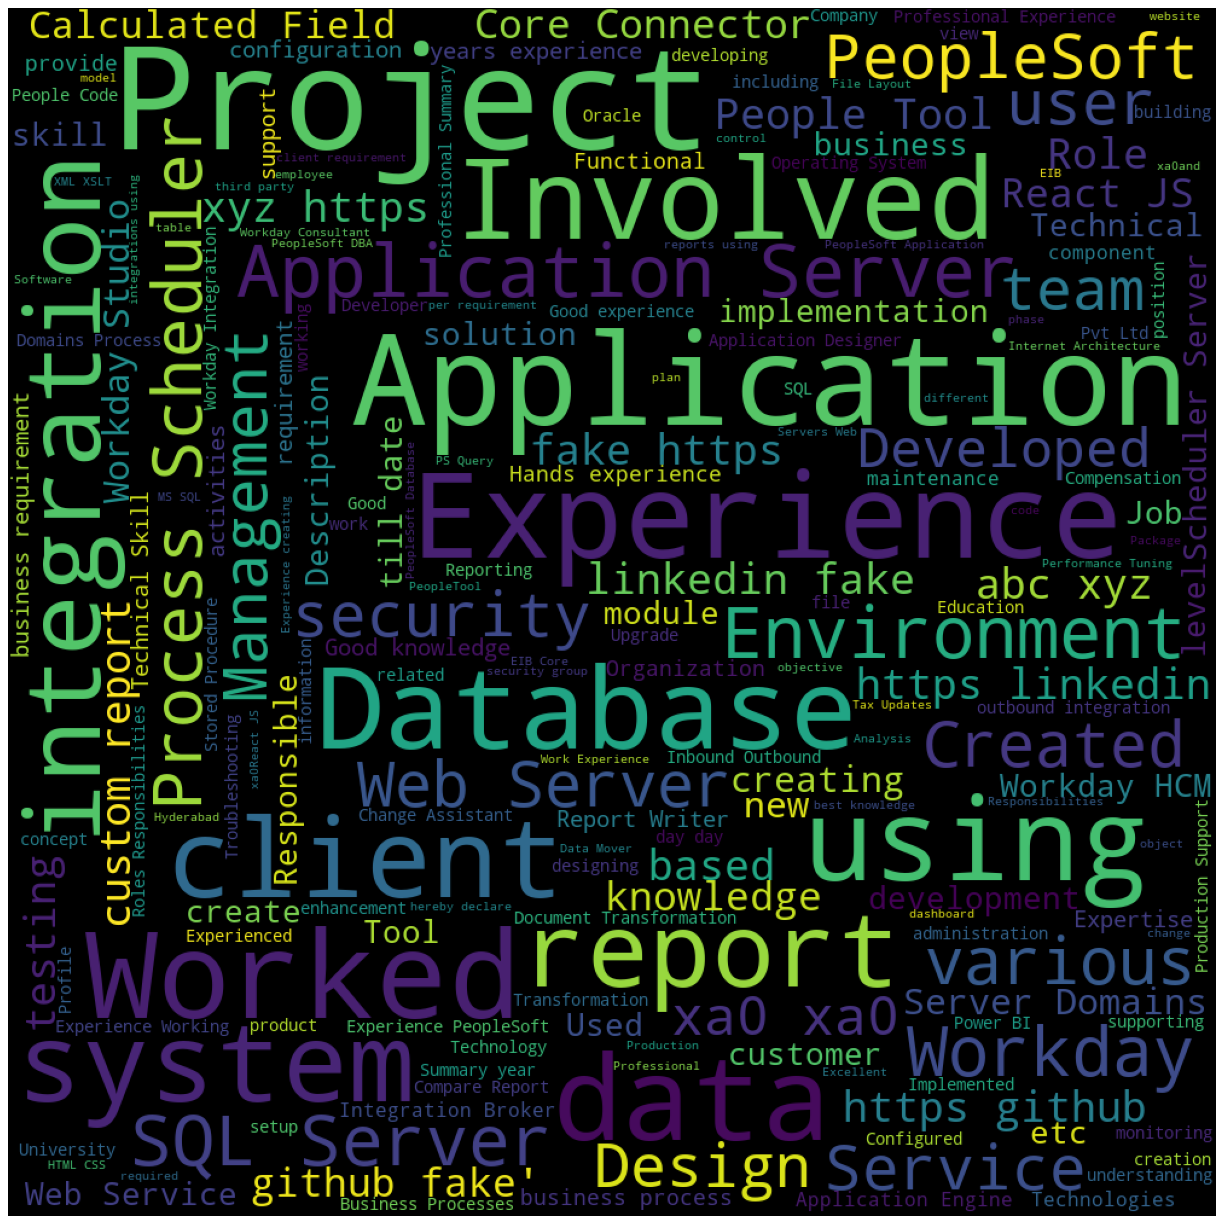

In [40]:
# Generating a wordcloud
from wordcloud import WordCloud
allwords = " ".join([txt for txt in sentence_df["Text"]])
# allwords = " ".join([txt for txt in sentence_df['Text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

## Infernce
1. Words like Experience, Database, Project, Github are used very regularly

## b. Text Data Distribution

In [41]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [42]:
!pip install TextBlob

In [43]:
df['polarity'] = df['Clean Text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['Clean_len'] = df['Clean Text'].astype(str).apply(len)
df['word_count'] = df['Clean Text'].apply(lambda x: len(str(x).split()))


In [44]:
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [45]:
pio.renderers.default = 'colab'


Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.


In [46]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')


Inferences :

Vast majority of the sentiment polarity scores are greater than zero, means all of them are pretty positive.


In [47]:
#The distribution clean text lengths
df['Clean_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='Clean length',
    linecolor='black',
    yTitle='count',
    title='Clean Text Length Distribution')


In [48]:
#The distribution of review word count
df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Clean Text Word Count Distribution')


###top_n_words() returns the n-grams. n can be specified by user

In [49]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Clean Text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['CleanText' , 'count'])
df1.groupby('CleanText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in Clean Text')


experience 599
application 489
peoplesoft 453
workday 432
server 431
using 389
project 345
report 341
data 332
integration 303
sql 281
database 280
process 276
business 275
com 253
web 251
system 242
client 221
worked 220
knowledge 215


#### Inference
1. This plot demonstrates top unigrams or single most frequent words in the book.
2. Since the resumes are related to technical skills, this plot lines perfectly with that.
3. Words like "data", "sql", "reports" are used very often

### The distribution of top bigrams after removing stop words


In [50]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Clean Text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['CleanText' , 'count'])
df4.groupby('CleanText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in Clean Text')


http www 162
com fake 156
sql server 117
process scheduler 109
application server 104
react js 93
www linkedin 82
linkedin com 82
github com 82
abc xyz 78
xyz com 78
com 911234567890 78
911234567890 http 78
fake http 78
www github 78
web server 74
workday studio 72
workday hcm 69
business process 69
people tools 68


#### Inference
1. words like "sql server", "http www", "abc xyz" are used together very often
2. This plot demonstrates the frequent use of bigrams

### The distribution of Top trigrams after removing stop words


In [51]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Clean Text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['CleanText' , 'count'])
df6.groupby('CleanText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in Clran Text')


http www linkedin 82
www linkedin com 82
abc xyz com 78
xyz com 911234567890 78
com 911234567890 http 78
911234567890 http www 78
linkedin com fake 78
com fake http 78
fake http www 78
http www github 78
www github com 78
github com fake 78
application server domains 32
process scheduler server 31
server domains process 30
domains process scheduler 30
application server web 27
peoplesoft internet architecture 26
process scheduler servers 25
server web server 25


## c. Part of Speech

In [52]:
from textblob import TextBlob

In [53]:
import plotly.express as px

In [54]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Text(0.5, 1.0, 'Top Part-of-Speech tagging for corpus')

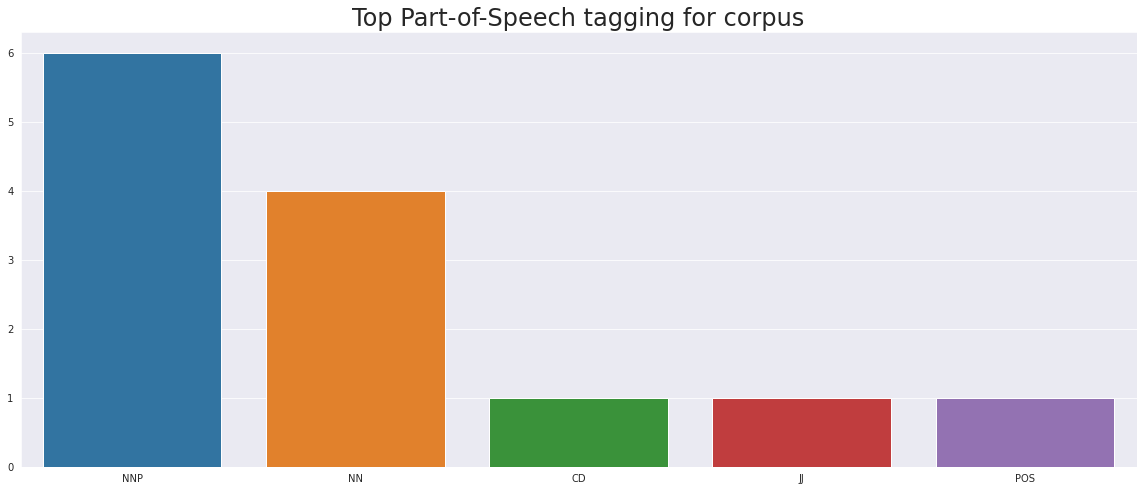

In [55]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
blob = TextBlob(str(sentence_df['Text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
sns.barplot(x=pos_df.keys(),y=pos_df.values)
plt.title('Top Part-of-Speech tagging for corpus', fontsize = 24)
# pos_df.iplot(
#     kind='bar',
#     xTitle='POS',
#     yTitle='count', 
#     title='Top 20 Part-of-speech tagging for corpus')

#### Inference
1. This plot represents the frequency of occurance of part-of-speech in the resumes
2. Proper nouns and nouns are used most often in the resumes followed by adjectives <br>
#### labels = 
1. 'NN': 'Noun'
2. 'CD': 'numeral, cardinal'
3. 'JJ': 'adjective or numeral ordinal'
4. 'NNS': 'noun, proper, singular'
5. 'DT': 'determiner'
6. 'VBP': 'verb, base,a plural'
7. 'IN': 'preposition or conjunction, subordinating'
8. 'WP':	'Wh-pronoun'
9. 'PRP$':	'Possessive pronoun'
10.  'VBG':	'Verb, gerund/present participle'
11. 'CC': 'conjunction, coordinating'
12. 'RB':	'Adverb'
13. 'VBD':	'Verb, past tense'
14. 'NNP': 'noun, proper, plural'

In [56]:
blob = TextBlob(str(df['Clean Text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for Text corpus')
